In [38]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import copy

In [39]:
with open('../pkl/COVID_weekly_tensor_ver2.pkl', 'rb') as f:
    travel_tensors_raw = pickle.load(f) 

In [40]:
# with open('../pkl/COVID_sorted_home_weekly.pkl', 'rb') as f:
#     home_adj = pickle.load(f) 

In [41]:
def f2(x): 
    return x[1] 

def get_new_order(tensor):
    traffic_dict = dict(zip(range(54), np.sum(np.sum(tensor, axis=0)[:54,:54], axis=0)))
    res = sorted(traffic_dict.items(), key=f2, reverse = True)
    new_order = np.array(res)[:,0].astype(int)
    return new_order

In [42]:
new_order = get_new_order(travel_tensors_raw)

In [43]:
new_order

array([ 5, 21, 32, 19,  6,  1,  7, 15, 33, 24,  4, 10,  3, 29, 34, 16, 11,
       37, 23, 31, 12, 40,  2,  8,  9, 18, 20, 22, 30, 35, 48, 26, 28, 46,
        0, 51, 36, 13, 17, 25, 27, 42, 43, 44, 14, 38, 39, 41, 45, 47, 49,
       50, 52, 53])

In [25]:
def save_object(obj, filename):
    with open(filename, 'wb') as output:  # Overwrites any existing file.
        pickle.dump(obj, output, pickle.HIGHEST_PROTOCOL)

In [26]:
new_tensor = copy.deepcopy(travel_tensors_raw)

In [27]:
for i in range(len(travel_tensors_raw)):
    adjmat = travel_tensors_raw[i][:54,:54][:,new_order][new_order,:]
    new_tensor[i] = np.concatenate((adjmat, adjmat.T),axis=1)

In [28]:
len(new_tensor)

22

In [29]:
np.sum(new_tensor, axis=0)[:54,:54].shape

(54, 54)

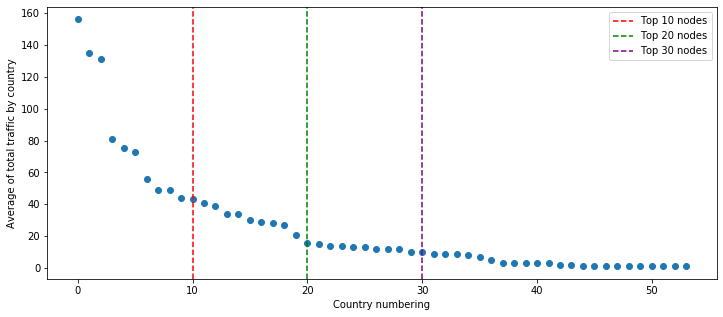

In [53]:
# How to set a cutline
plt.figure(figsize=(12,5))
plt.scatter(range(54), np.sum(np.sum(new_tensor, axis=0)[:54,:54], axis=0))
plt.axvline(x=10, linestyle='--', color='red',label = "Top 10 nodes")
plt.axvline(x=20, linestyle='--', color='green',label = "Top 20 nodes")
plt.axvline(x=30, linestyle='--', color='purple', label = "Top 30 nodes")

plt.ylabel("Average of total traffic by country")
plt.xlabel("Country numbering")
plt.legend()
plt.show()

In [31]:
new_order

array([ 5, 21, 32, 19,  6,  1,  7, 15, 33, 24,  4, 10,  3, 29, 34, 16, 11,
       37, 23, 31, 12, 40,  2,  8,  9, 18, 20, 22, 30, 35, 48, 26, 28, 46,
        0, 51, 36, 13, 17, 25, 27, 42, 43, 44, 14, 38, 39, 41, 45, 47, 49,
       50, 52, 53])

In [62]:
a= np.sum(np.sum(new_tensor, axis=0)[:54,:54], axis=0)
np.sum(a[:20])/np.sum(a)

0.8441091954022989

In [32]:
for t in range(20):
    a = np.sum(new_tensor[t][0,:54] - travel_tensors_raw[t][5,new_order])
    print(a)

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [33]:
save_object(new_tensor, '../pkl/COVID_sorted_W_tensors_ver2.pkl')

In [34]:
save_object(new_order, '../pkl/new_COVID_order_ver2.pkl')